# Data Visualization: Explorando com Seaborn

## Objetivos
* Importe dados e trabalhe com dataframes
* Aprenda a tratar os dados antes de análisar
* Saiba como utilizar o Seaborn para criação de diferentes gráficos
* Utilize o Python Pandas com a incrível ferramenta do Google Colaboratory
* Desenvolva técnicas gráficas e quantitativas, buscando a obtenção de informações relevantes

link: https://cursos.alura.com.br/course/data-visualization-com-seaborn

## Importando as bibliotecas necessárias

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums

## Importando o dataset e explorando os dados

In [155]:
# Caso deseje analisar o dataset desatualizado, remova o comentário do dados = pd.read_csv('tips.csv') e comente os outros read_csv ou vice e versa
dados = pd.read_csv('tips.csv')
#dados_desatualizado = pd.read_csv('tips.csv')
#dados = pd.read_csv('tips_atualizado.csv')
dados.sample(15)

,total_bill,tip,dessert,day,time,size
120,11.69,2.31,No,Thur,Lunch,2
25,17.81,2.34,No,Sat,Dinner,4
14,14.83,3.02,No,Sun,Dinner,2
160,21.50,3.50,No,Sun,Dinner,4
181,23.33,5.65,Yes,Sun,Dinner,2
81,16.66,3.40,No,Thur,Lunch,2
165,24.52,3.48,No,Sun,Dinner,3
65,20.08,3.15,No,Sat,Dinner,3
155,29.85,5.14,No,Sun,Dinner,5
98,21.01,3.00,Yes,Fri,Dinner,2


In [156]:
print(f'O conjunto de dados é formados por {dados.shape[0]} registros e possui {dados.shape[1]} atributos.')

O conjunto de dados é formados por 244 registros e possui 6 atributos.


In [157]:
print(f'A base de dados possui {dados.isna().sum().sum()} valores nulos')

A base de dados possui 0 valores nulos


In [158]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [159]:
dados_desatualizado.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [160]:
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [161]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [162]:
dados.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [163]:
dados.dessert.unique()

array(['No', 'Yes'], dtype=object)

In [164]:
dados.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [165]:
nome_colunas = {'total_bill': 'valor_da_conta', 
                       'tip': 'gorjeta', 
                       'dessert': 'sobremesa', 
                       'day': 'dia_da_semana', 
                       'time': 'hora_do_dia', 
                       'size': 'total_de_pessoas'}

dicionario_refeicoes = {'Lunch': 'Almoço', 
                        'Dinner': 'Jantar'}

dicionario_dias = {'Sun': 'Domingo',
                   'Sat': 'Sábado',
                   'Thur': 'Quinta',
                   'Fri': 'Sexta'}

dicionario_boleano = {'Yes': 'Sim', 
                      'No': 'Não'}

In [166]:
gorjetas = dados.rename(columns=nome_colunas)
gorjetas.sobremesa = gorjetas.sobremesa.map(dicionario_boleano)
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dicionario_dias)
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(dicionario_refeicoes)
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
11,35.26,5.00,Não,Domingo,Jantar,4
154,19.77,2.00,Não,Domingo,Jantar,4
119,24.08,2.92,Não,Quinta,Almoço,4
86,13.03,2.00,Não,Quinta,Almoço,2
170,50.81,10.00,Sim,Sábado,Jantar,3
159,16.49,2.00,Não,Domingo,Jantar,4
23,39.42,7.58,Não,Sábado,Jantar,4
92,5.75,1.00,Sim,Sexta,Jantar,2
132,11.17,1.50,Não,Quinta,Almoço,2
234,15.53,3.00,Sim,Sábado,Jantar,2


## Analise 01 - Valor da conta e gorjeta

In [167]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

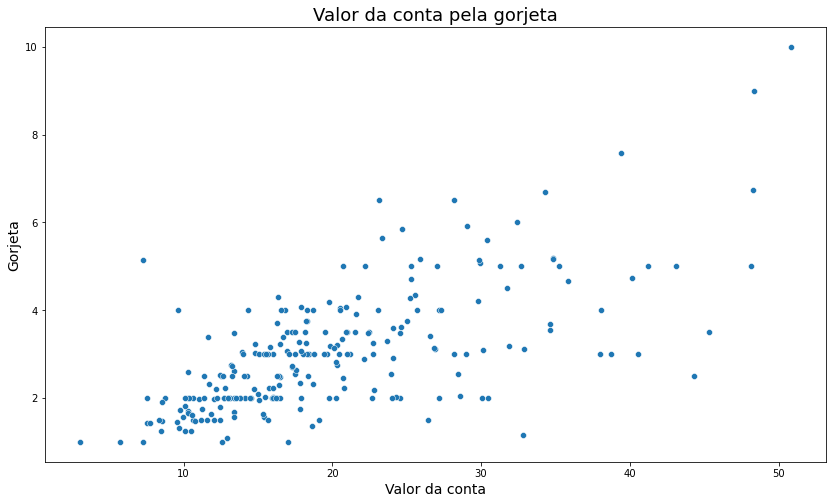

In [168]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas, ax=ax)
ax.set_xlabel('Valor da conta', fontsize=14)
ax.set_ylabel('Gorjeta', fontsize=14)
ax.set_title('Valor da conta pela gorjeta', fontsize=18)
plt.show()

 **Visualmente, o valor da gorjeta aumenta com o valor da conta**

In [169]:
gorjetas['porcentagem'] = round(gorjetas['gorjeta'] / gorjetas['valor_da_conta'], 2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


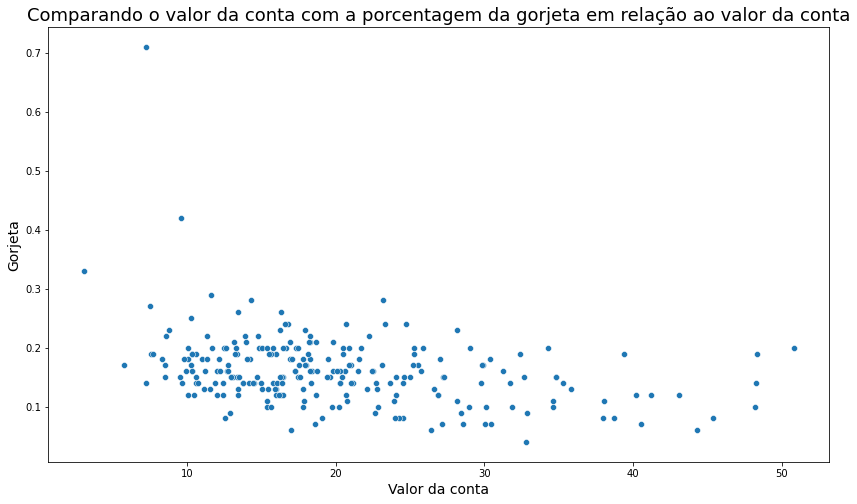

In [170]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas, ax=ax)
ax.set_xlabel('Valor da conta', fontsize=14)
ax.set_ylabel('Gorjeta', fontsize=14)
ax.set_title('Comparando o valor da conta com a porcentagem da gorjeta em relação ao valor da conta', fontsize=18)
plt.show()

 **Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

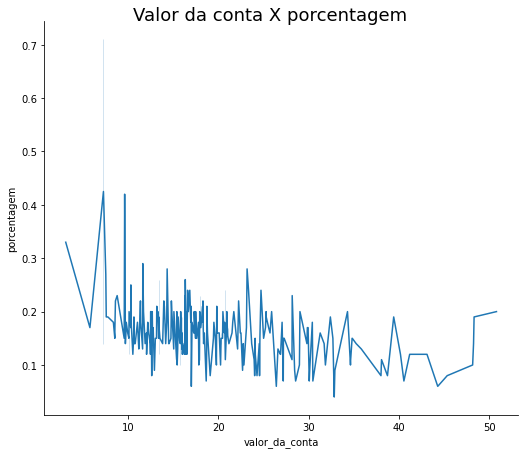

In [171]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas, aspect=1.2, kind='line', height=6)
ax.fig.suptitle('Valor da conta X porcentagem', y=1.01, fontsize=18)
plt.show()

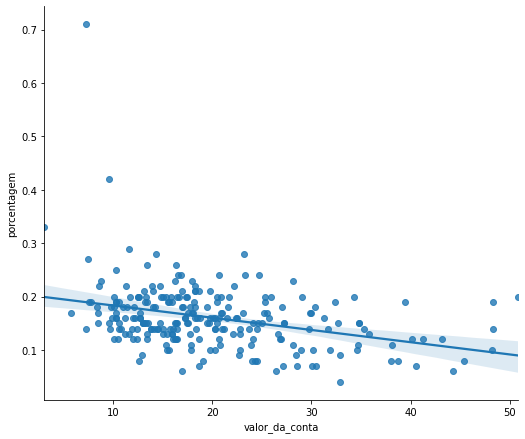

In [172]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas, aspect=1.2, height=6)
plt.show()

In [173]:
gorjetas.describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160943
std,8.902412,1.383638,0.951100,0.061030
min,3.070000,1.000000,1.000000,0.040000
25%,13.347500,2.000000,2.000000,0.130000
50%,17.795000,2.900000,2.000000,0.155000
75%,24.127500,3.562500,3.000000,0.190000
max,50.810000,10.000000,6.000000,0.710000


In [174]:
gorjetas.groupby('sobremesa').describe()[['valor_da_conta', 'gorjeta', 'porcentagem']]

valor_da_conta                                                    \
                   count       mean       std   min     25%    50%     75%   
sobremesa                                                                    
Não                151.0  19.188278  8.255582  7.25  13.325  17.59  22.755   
Sim                 93.0  20.756344  9.832154  3.07  13.420  17.92  26.860   

                 gorjeta            ...              porcentagem            \
             max   count      mean  ...    75%   max       count      mean   
sobremesa                           ...                                      
Não        48.33   151.0  2.991854  ...  3.505   9.0       151.0  0.159536   
Sim        50.81    93.0  3.008710  ...  3.680  10.0        93.0  0.163226   

                                                    
                std   min   25%   50%    75%   max  
sobremesa                                           
Não        0.039889  0.06  0.14  0.16  0.185  0.29  
Sim        0.085060  0.04  0.11  0.15  0.200  0.71  

[2 rows x 24 columns]

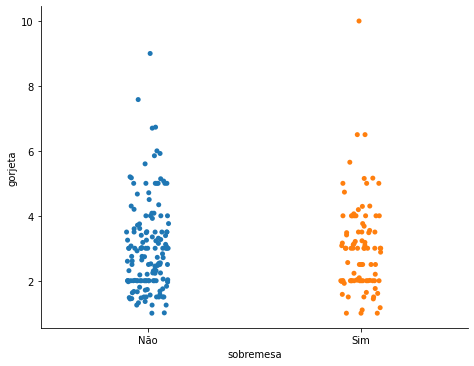

In [175]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas, aspect=1.3, height=5)
plt.show()

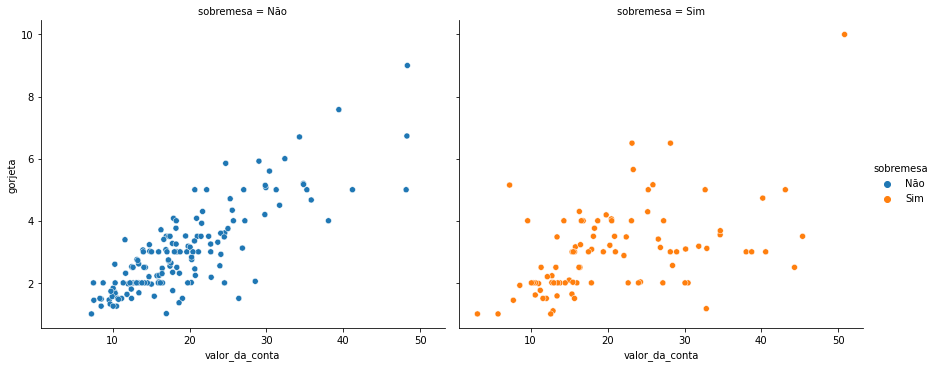

In [176]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa', aspect=1.2, height=5)
plt.show()

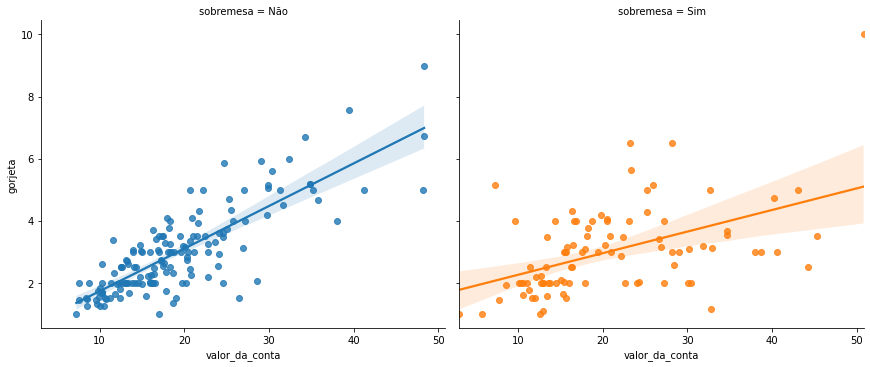

In [177]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa', aspect=1.2, height=5)
plt.show()

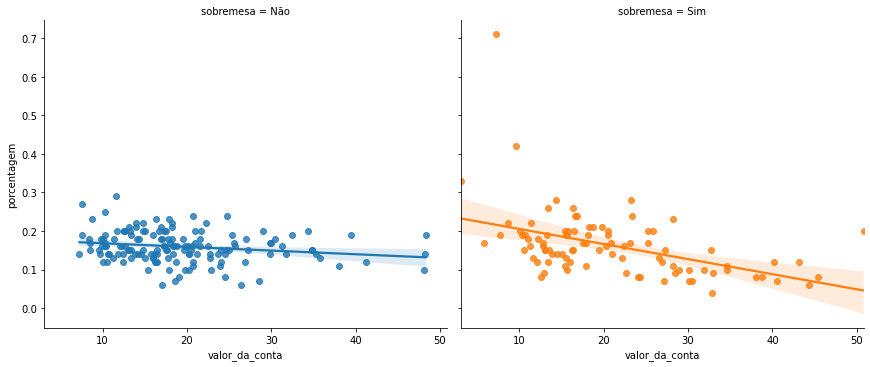

In [178]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', data=gorjetas, col='sobremesa', aspect=1.2, height=5)
plt.show()

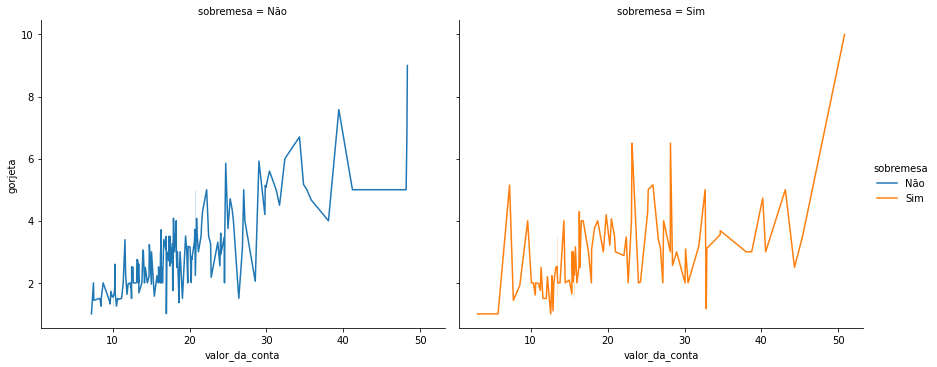

In [179]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa', kind='line', aspect=1.2, height=5)
plt.show()

In [180]:
gorjetas.sobremesa.value_counts(normalize=True)

Não    0.618852
Sim    0.381148
Name: sobremesa, dtype: float64

## Teste de hipotese 01

**H<sup>null</sup>** 
> A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>** 
> A distribuição da taxa da gorjeta é a mesma nos dois grupos

In [181]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
sobremesa.head()

56    0.08
58    0.16
60    0.16
61    0.14
62    0.18
Name: porcentagem, dtype: float64

In [182]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem
sem_sobremesa.head()

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [183]:
_, p_value = ranksums(sobremesa, sem_sobremesa)

In [184]:
print(f'O valor do p_value é: {p_value}')

O valor do p_value é: 0.5266635660124415


Como o p_value é muito alto, não descartamos o hipotese nula, logo:

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

## Analisando a gorjeta nos dias da semana

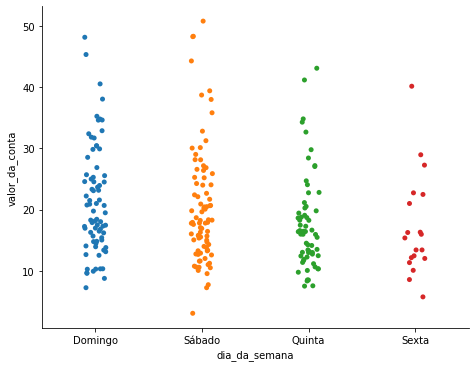

In [185]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas, aspect=1.3, height=5)
plt.show()

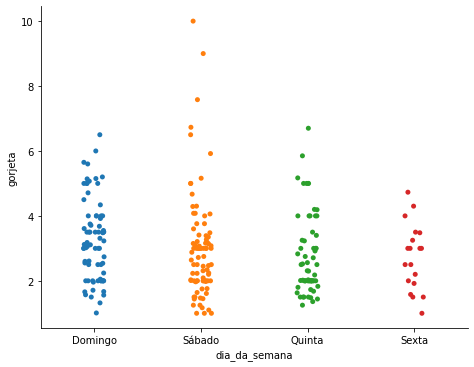

In [186]:
sns.catplot(x='dia_da_semana', y='gorjeta', data=gorjetas, aspect=1.3, height=5)
plt.show()

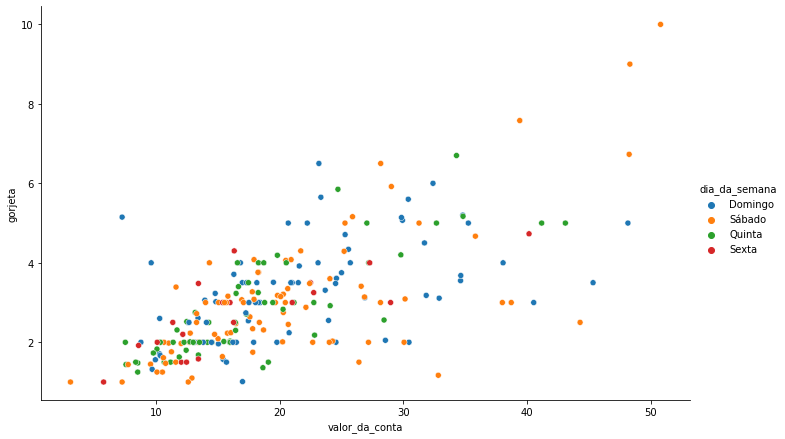

In [187]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=gorjetas, hue='dia_da_semana', height=6, aspect=1.6)
plt.show()

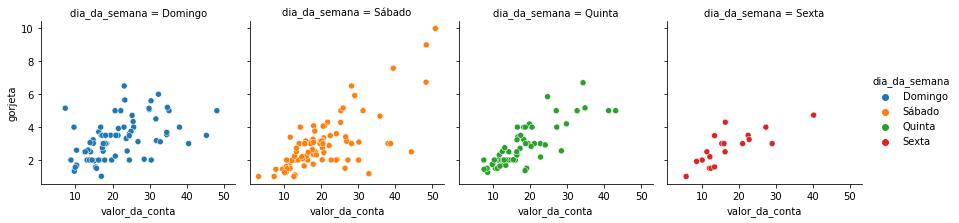

In [188]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=gorjetas, hue='dia_da_semana', col='dia_da_semana', height=3, aspect=1)
plt.show()

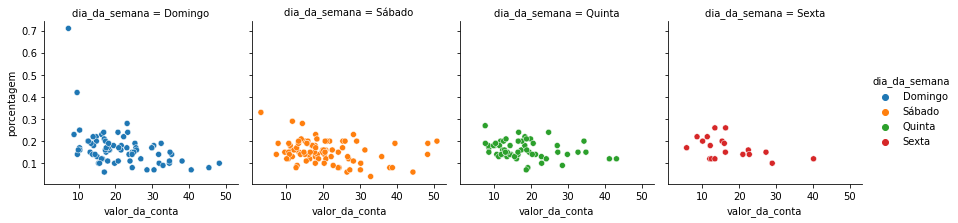

In [189]:
sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas, hue='dia_da_semana', col='dia_da_semana', height=3, aspect=1)
plt.show()

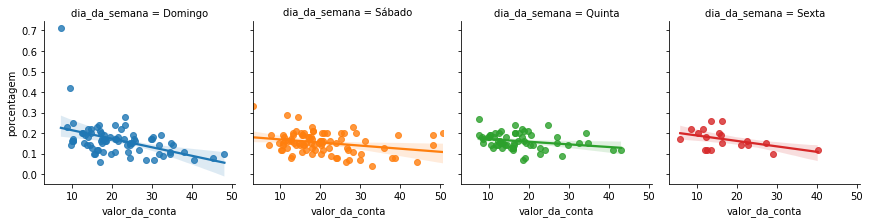

In [190]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas, hue='dia_da_semana', col='dia_da_semana', height=3, aspect=1)
plt.show()

In [191]:
gorjetas.corr()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
valor_da_conta,1.000000,0.675734,0.598315,-0.334753
gorjeta,0.675734,1.000000,0.489299,0.343895
total_de_pessoas,0.598315,0.489299,1.000000,-0.141157
porcentagem,-0.334753,0.343895,-0.141157,1.000000


In [192]:
gorjetas.groupby('dia_da_semana').mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [193]:
print('Frequência de dias: ')
gorjetas['dia_da_semana'].value_counts()

Frequência de dias: 


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipotese 02

**H<sup>null</sup>** 
> A distribuição do valor da conta é igual para o sabado e o domingo

**H<sup>alt</sup>** 
> A distribuição do valor da conta não é igual para o sabado e o domingo

In [194]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"')['valor_da_conta']
valor_conta_domingo.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: valor_da_conta, dtype: float64

In [195]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"')['valor_da_conta']
valor_conta_sabado.head()

19    20.65
20    17.92
21    20.29
22    15.77
23    39.42
Name: valor_da_conta, dtype: float64

In [196]:
_, p_value = ranksums(valor_conta_domingo, valor_conta_sabado)

print(f'O valor do p value é: {p_value}')

O valor do p value é: 0.3576728477868443


Portando não temos evidência para descartar a nossa hipotese nula, logo a distribuição do valor da conta é **igual** para o sábado e o domingo

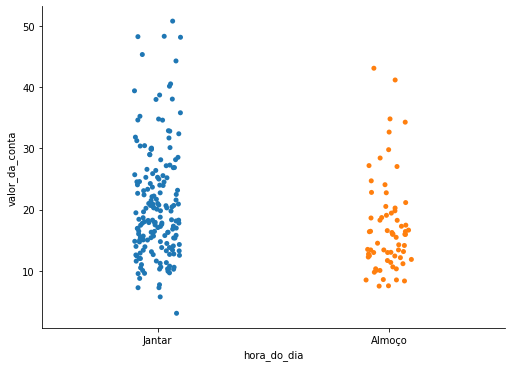

In [197]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, height=5, aspect=1.4)
plt.show()

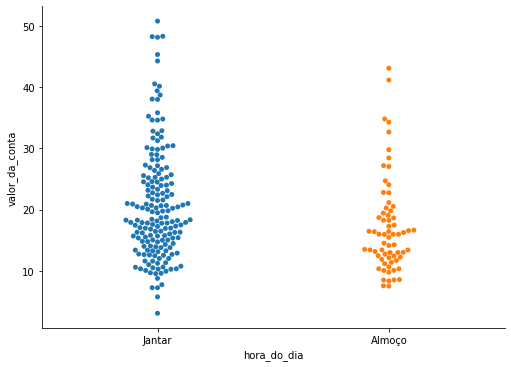

In [198]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, kind='swarm', height=5, aspect=1.4)
plt.show()

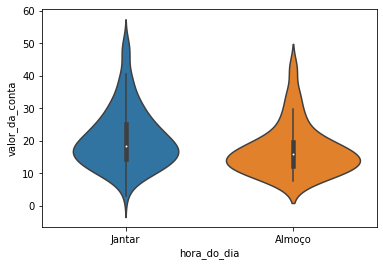

In [199]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, height=5, aspect=1.4)
plt.show()

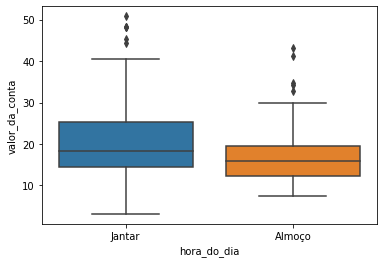

In [200]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)
plt.show()

In [201]:
almoco = gorjetas.query('hora_do_dia == "Almoço"')['valor_da_conta']
almoco.head()

77    27.20
78    22.76
79    17.29
80    19.44
81    16.66
Name: valor_da_conta, dtype: float64

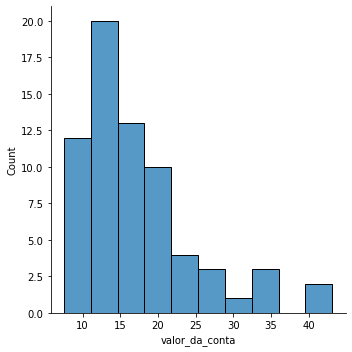

In [202]:
sns.displot(almoco)
plt.show()

In [203]:
jantar = gorjetas.query('hora_do_dia == "Jantar"')['valor_da_conta']
jantar.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: valor_da_conta, dtype: float64

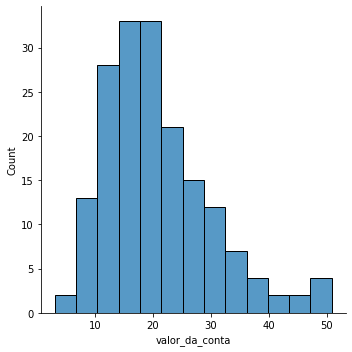

In [204]:
sns.displot(jantar)
plt.show()

In [205]:
gorjetas.groupby('hora_do_dia').mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [206]:
gorjetas.groupby('hora_do_dia').describe()['valor_da_conta']

,count,mean,std,min,25%,50%,75%,max
hora_do_dia,,,,,,,,
Almoço,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Jantar,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


## Teste de hipotese 03

**H<sup>null</sup>**
> A distribuição do valor da conta é igual para o almoço e o jantar 

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual para o almoço e o jantar

In [207]:
_, p_value = ranksums(almoco, jantar)
print(f'O p value é: {p_value}')

O p value é: 0.0011791039723641672


Temos evidências o suficiênte para descartar a hipotese nula, então podemos aceitar que a hipotese alternativa é verdadeira que a distribuição do valor da conta **não** é igual para o almoço e o jantar

## Teste de hipotese 04

**H<sup>null</sup>**
> A porcentagem da gorjeta é igual para o almoço e o jantar 

**H<sup>alt</sup>**
> A porcentagem da gorjeta não é igual para o almoço e o jantar

In [208]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"')['porcentagem']
porcentagem_almoco.head()

77    0.15
78    0.13
79    0.16
80    0.15
81    0.20
Name: porcentagem, dtype: float64

In [209]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"')['porcentagem']
porcentagem_jantar.head()

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [210]:
_, p_value = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O p value é: {p_value}')

O p value é: 0.2602493995587126


Não temos evidência para descartar a hipotese nula, logo A porcentagem da gorjeta é **igual** para o almoço e o jantar 